In [7]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:\\cleaning data\\heart attack\\heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


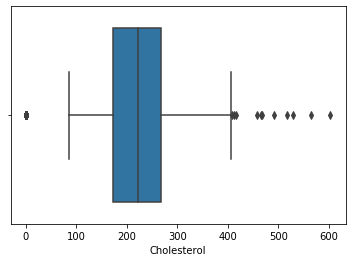

In [8]:
import seaborn as sns

sns.boxplot(df['Cholesterol'])

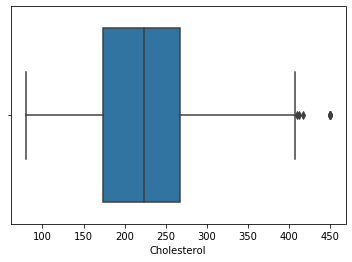

In [12]:
df['Cholesterol'] = [450 if x > 450 else 80 if x<70 else x for x in df['Cholesterol']]

sns.boxplot(df['Cholesterol'])

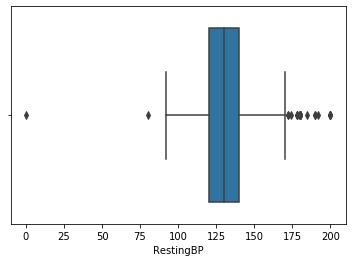

In [13]:
sns.boxplot(df['RestingBP'])

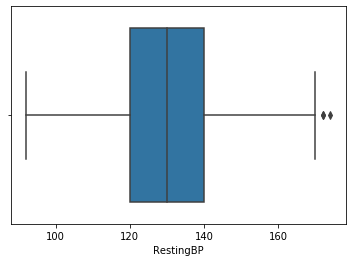

In [17]:
df['RestingBP'] = [165 if x >= 175 else 100 if x <= 80 else x for x in df['RestingBP']]
sns.boxplot(df['RestingBP'])

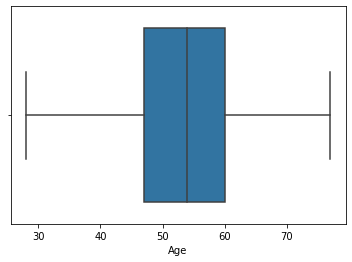

In [18]:
sns.boxplot(df['Age'])

In [19]:
from sklearn.preprocessing import LabelEncoder

LB=LabelEncoder()

df['Sex'] = LB.fit_transform(df['Sex'])
df['Cholesterol'] = LB.fit_transform(df['Cholesterol'])
df['ChestPainType'] = LB.fit_transform(df['ChestPainType'])
df['RestingECG'] = LB.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = LB.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = LB.fit_transform(df['ST_Slope'])



df.corr()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.272065,-0.042859,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.019680,-0.190845,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.011527,0.013128,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.272065,0.019680,-0.011527,1.000000,0.111550,0.064278,0.025046,-0.113292,0.155279,0.179259,-0.078744,0.113740
Cholesterol,-0.042859,-0.190845,0.013128,0.111550,1.000000,-0.188372,-0.177160,0.177036,0.016909,0.066647,0.064005,-0.138998
FastingBS,0.198039,0.120076,-0.073151,0.064278,-0.188372,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.025046,-0.177160,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.113292,0.177036,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155279,0.016909,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.179259,0.066647,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


In [20]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,147,0,1,172,0,0.0,2,0
1,49,0,2,160,40,0,1,156,0,1.0,1,1
2,37,1,1,130,141,0,2,98,0,0.0,2,0
3,48,0,0,138,72,0,1,108,1,1.5,1,1
4,54,1,2,150,53,0,1,122,0,0.0,2,0


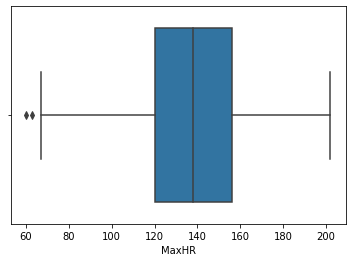

In [23]:
sns.boxplot(df['MaxHR'])


In [25]:
features=df[['Age','Sex','FastingBS','ExerciseAngina','Oldpeak','MaxHR','ST_Slope','ChestPainType']]

target  = df['HeartDisease']

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3)
clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))


clf.fit(X_train,y_train)



Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [26]:
clf_score = clf.score(X_test,y_test)

In [27]:
clf_score.mean()

0.8695652173913043

In [28]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression().fit(X_train,y_train)

model1_score = model1.score(X_test,y_test)
model1_score.mean()

C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.8623188405797102

In [30]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(criterion='gini')

model2.fit(X_train,y_train)

model2_score = model2.score(X_test,y_test)
model2_score.mean()

C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To 

0.855072463768116

In [32]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier().fit(X_train,y_train)

model3_score=model3.score(X_test,y_test)

model3_score.mean()

C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\TANU\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the re

0.8405797101449275